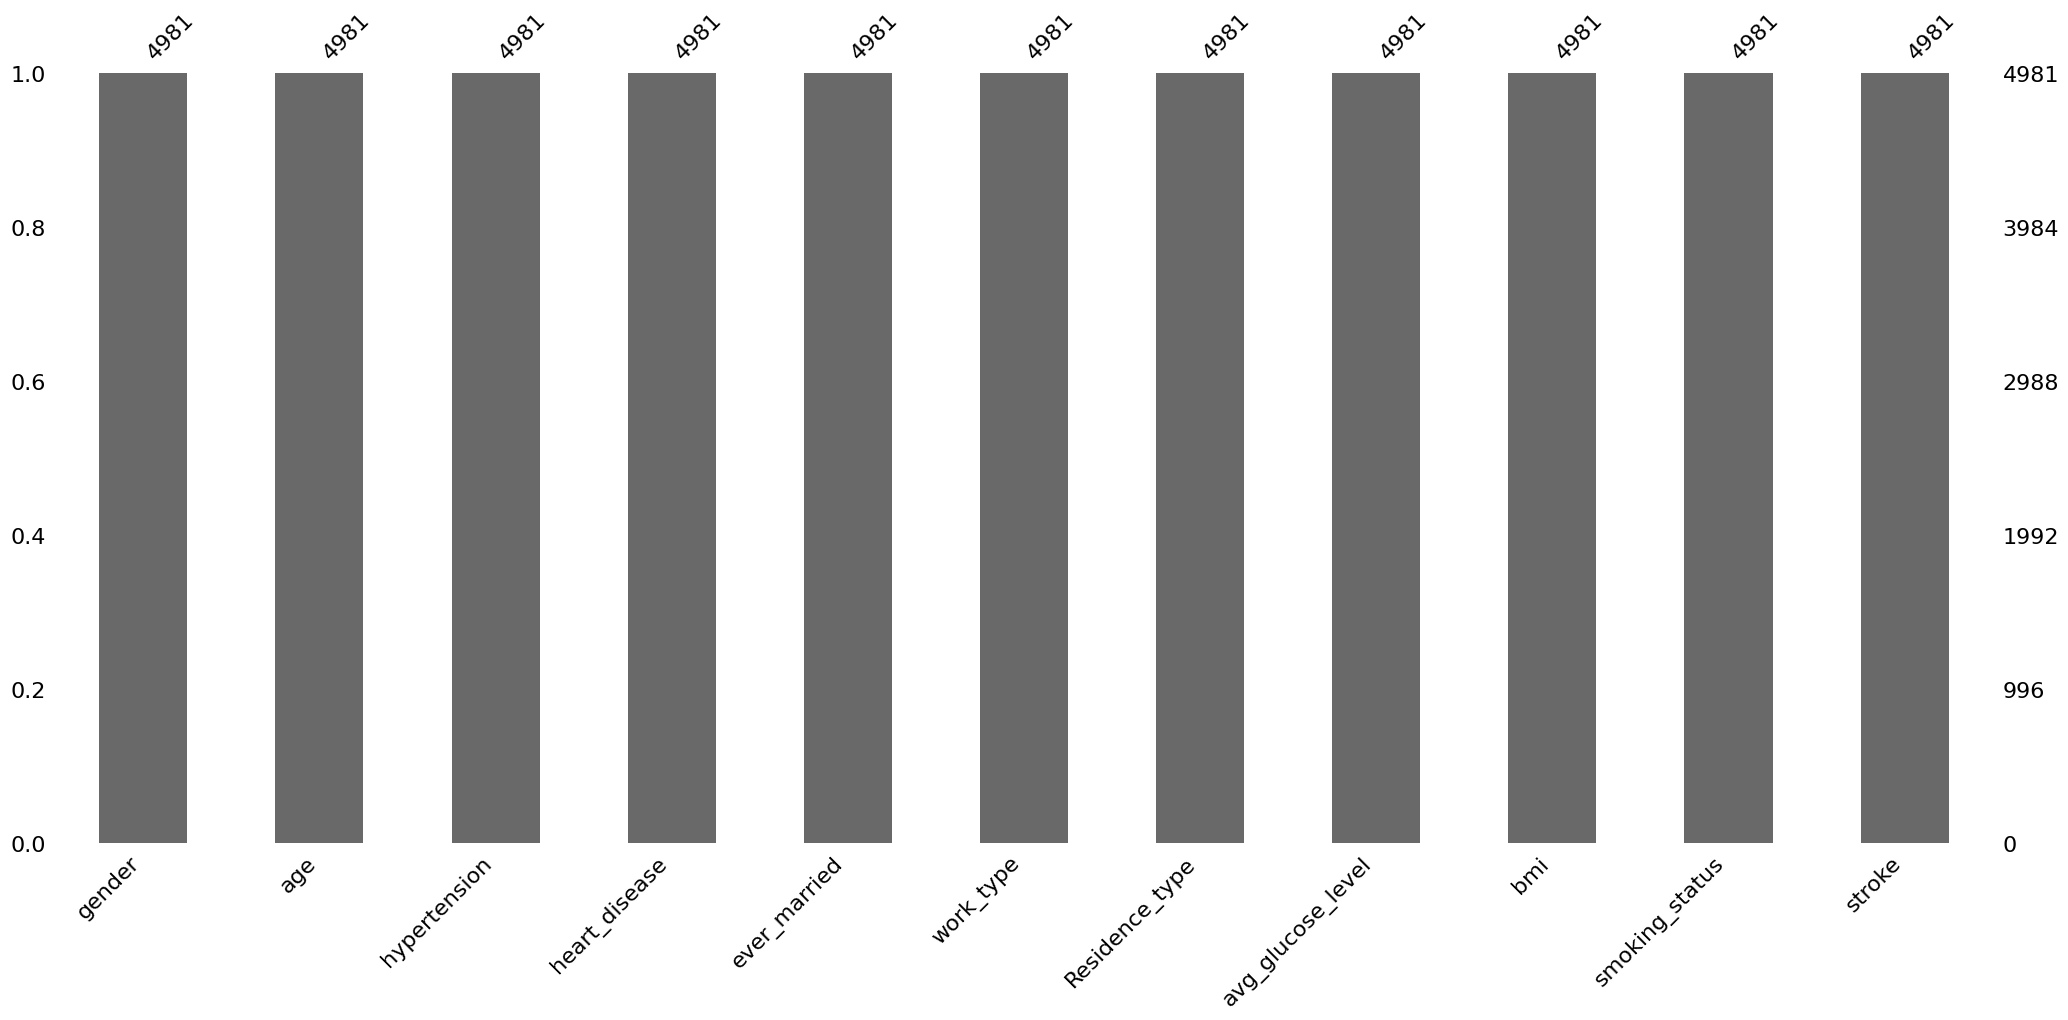

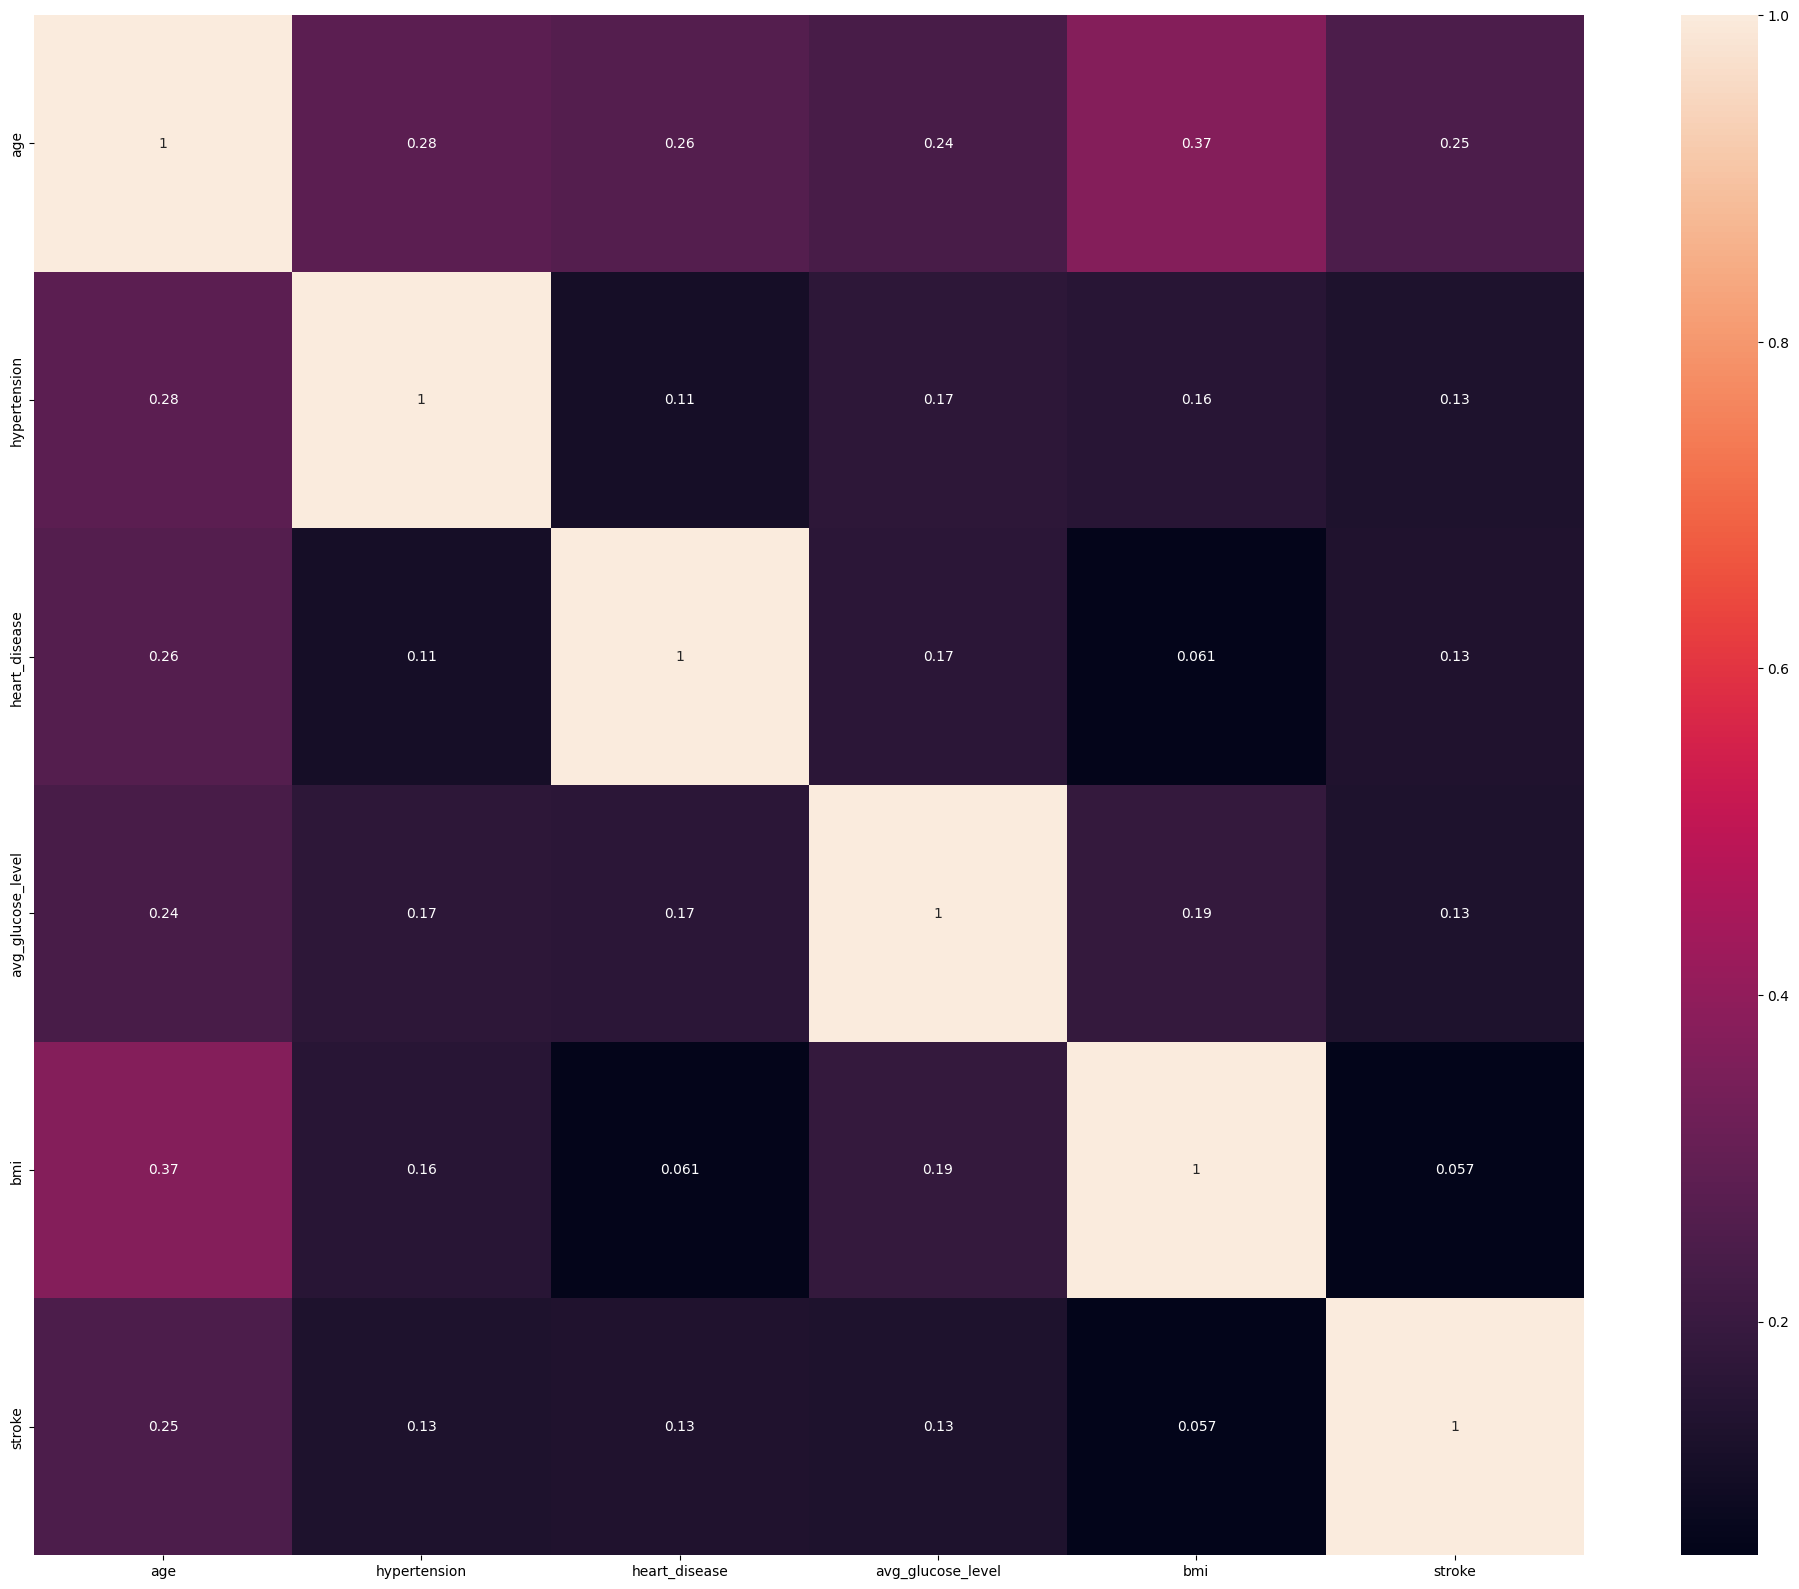

In [22]:
# display plots inline
%matplotlib inline 

# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline

# load dataset
df = pd.read_csv("stroke_data.csv")

# check for missing values
msno.bar(df)

# check for correlation
fig = plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True)
plt.savefig("Heatmap.png")

In [23]:
# check dataset variables and summary statistics
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [24]:
# look for response categories
print(df['gender'].value_counts())

# convert string data to numerical
def gender_to_numeric(x):
        if x=='Female': return 0
        if x=='Male':   return 1

df['gender'] = df['gender'].apply(gender_to_numeric)

Female    2907
Male      2074
Name: gender, dtype: int64


In [25]:
# look for response categories
print(df['ever_married'].value_counts())

# convert string data to numerical
def ever_married_to_numeric(x):
        if x=='Yes': return 1
        if x=='No':   return 0

df['ever_married'] = df['ever_married'].apply(ever_married_to_numeric)

Yes    3280
No     1701
Name: ever_married, dtype: int64


In [26]:
# look for response categories
print(df['Residence_type'].value_counts())

# convert string data to numerical
def Residence_type_to_numeric(x):
        if x=='Urban': return 1
        if x=='Rural':   return 0

df['Residence_type'] = df['Residence_type'].apply(Residence_type_to_numeric)

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64


In [27]:
# look for response categories
print(df['work_type'].value_counts())

# hot encoder for multiple response categories
encoder=ce.OneHotEncoder(cols='work_type',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df = encoder.fit_transform(df)

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64


In [28]:
# look for response categories
print(df['smoking_status'].value_counts())

# hot encoder for multiple response categories
encoder=ce.OneHotEncoder(cols='smoking_status',handle_unknown='return_nan',return_df=True,use_cat_names=True)
df = encoder.fit_transform(df)

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64


In [29]:
# create Numpy array for dependent variable y
y = df['stroke'].values

# create Numpy 2-D array for independent variables X
df_temp = df.copy(deep=True)
df_temp.drop('stroke', inplace=True, axis=1)
X = df_temp.values

In [30]:
# standardize independent variables X
std_scl = StandardScaler()
std_scl.fit_transform(X)

array([[ 1.1839085 ,  1.04058433, -0.32618577, ..., -0.76471668,
        -0.42958377, -0.65643786],
       [ 1.1839085 ,  1.61427033, -0.32618577, ...,  1.30767384,
        -0.42958377, -0.65643786],
       [-0.84465987,  0.24624988, -0.32618577, ..., -0.76471668,
         2.32783471, -0.65643786],
       ...,
       [-0.84465987,  0.06973111,  3.06573766, ..., -0.76471668,
         2.32783471, -0.65643786],
       [ 1.1839085 , -0.15091734, -0.32618577, ..., -0.76471668,
         2.32783471, -0.65643786],
       [-0.84465987,  1.61427033,  3.06573766, ...,  1.30767384,
        -0.42958377, -0.65643786]])

In [31]:
# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=2)


# initialize Logistic Regression
model = LogisticRegression(solver='liblinear')

# fit Logistic Regression
model.fit(X_train, y_train)

# predict y values
y_pred = model.predict(X_test)
print("prediction for datapoint 0:", model.predict([X[0]]))

# find and dispay model coefficients (log-odds)
log_odds = model.coef_[0]
print(pd.DataFrame(log_odds, df_temp.columns, columns=['coef']).sort_values(by='coef', ascending=False))

#  compute and dispay model coefficients (odds)
odds = np.exp(model.coef_[0])
print("\n")
print(pd.DataFrame(odds, df_temp.columns, columns=['coef']).sort_values(by='coef', ascending=False))

# display model score for test data (correct prediction perecentage)
print("\n model score")
print(model.score(X_test, y_test))

prediction for datapoint 0: [0]
                                    coef
hypertension                    0.368153
heart_disease                   0.362710
age                             0.067474
avg_glucose_level               0.003382
bmi                            -0.018422
Residence_type                 -0.020611
gender                         -0.044710
ever_married                   -0.397558
work_type_children             -0.546666
smoking_status_smokes          -0.883126
smoking_status_Unknown         -0.984971
smoking_status_formerly smoked -1.016375
work_type_Private              -1.077622
work_type_Govt_job             -1.225200
smoking_status_never smoked    -1.231658
work_type_Self-employed        -1.266642


                                    coef
hypertension                    1.445064
heart_disease                   1.437219
age                             1.069802
avg_glucose_level               1.003388
bmi                             0.981747
Residence_type         

[[1422    0]
 [  73    0]]
accuracy: 0.9511705685618729
recall: 0.0


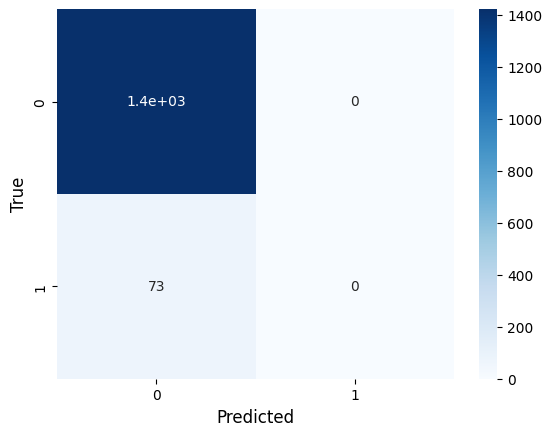

In [32]:
# create confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

# visualize confusion matrix
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

# display accuracy, precision, recall, f1 score
print("accuracy:", accuracy_score(y_test, y_pred))
#print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))
#print("f1 score:", f1_score(y_test, y_pred))


Test confusion_matrix


Text(50.722222222222214, 0.5, 'True')

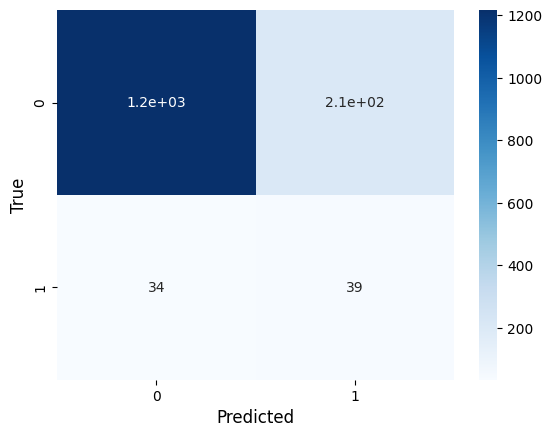

In [33]:
# check predicted probabilites
model.predict_proba(X_test)
model.predict_proba(X_test)[:, 1]

# compute predictions for a different cut-off (0.10)
y_pred_10 = model.predict_proba(X_test)[:, 1] > 0.1
cf_matrix_10 = confusion_matrix(y_test, y_pred_10)

# display confusion matrix
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix_10, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

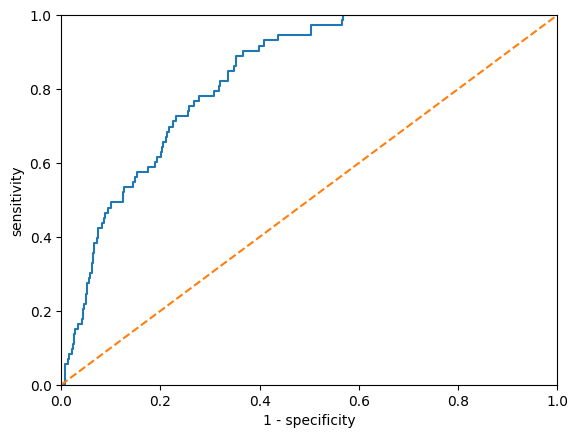

In [34]:
# compute false positive rate, true positive rates for different cut-off points
y_pred_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

# display ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

In [35]:
# compute ROC AUC score
print("model 1 AUC score:", roc_auc_score(y_test, y_pred_prob[:, 1]))

# compute ROC AUC score for a restrictec model (with only two independent variables)
model2 = LogisticRegression()
model2.fit(X_train[:, 0:2], y_train)
y_pred_proba3 = model2.predict_proba(X_test[:, 0:2])
print("model 2 AUC score:", roc_auc_score(y_test, y_pred_proba3[:, 1]))

model 1 AUC score: 0.8311176617921893
model 2 AUC score: 0.8161088954395699


In [36]:
# load dataset anew
df = pd.read_csv("stroke_data.csv")

# initialize K-fold
kf = KFold(n_splits=5, shuffle=True)

# create new variable columns
df['male'] = df['gender'] == 'Male'
df['smokes'] = df['smoking_status'] == 'smokes'
df['urban'] = df['Residence_type'] == 'Urban'
df['work_in_private'] = df['work_type'] == 'Private'
df['ever_married'] = df['ever_married'] == 'Yes'

# create numpy 2-D arrays for different models
X1 = df[['male', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','smokes', 'urban', 'work_in_private', 'ever_married']].values
X2 = df[['male', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','smokes', 'urban']].values
X3 = df[['male', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level']].values
y = df['stroke'].values

# define function two compute means of accuracy, precision, recall, f1 score for different k-fold splits
def score_model(X, y, kf):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = LogisticRegression(max_iter=300)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        #precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        #f1_scores.append(f1_score(y_test, y_pred))
    print("accuracy:", np.mean(accuracy_scores))
    #print("precision:", np.mean(precision_scores))
    print("recall:", np.mean(recall_scores))
    #print("f1 score:", np.mean(f1_scores))

# fit model and display mean model scores for each model
print("Logistic Regression for Model 1")
score_model(X1, y, kf)
print()
print("Logistic Regression for Model 2")
score_model(X2, y, kf)
print()
print("Logistic Regression for Model 3")
score_model(X3, y, kf)

Logistic Regression for Model 1
accuracy: 0.9502084566953874
recall: 0.00392156862745098

Logistic Regression for Model 2
accuracy: 0.9504116767974606
recall: 0.004545454545454545

Logistic Regression for Model 3
accuracy: 0.9502096651399983
recall: 0.0


Eigenvalues:
[2.07151173e+03 4.81484182e+02 3.87599130e+01 3.58424616e-01
 2.93327416e-01 2.50350088e-01 2.32585523e-01 1.94836368e-01
 1.62607096e-01 1.40984191e-01 1.15200226e-01 7.91765659e-02
 5.60359809e-02 4.59466315e-02 7.48955856e-31 2.89841714e-31]

Variances (Percentage):
[7.98675048e+01 1.85637086e+01 1.49439537e+00 1.38191251e-02
 1.13092909e-02 9.65229235e-03 8.96737637e-03 7.51195095e-03
 6.26934564e-03 5.43567065e-03 4.44156530e-03 3.05266664e-03
 2.16047725e-03 1.77148058e-03 2.88761268e-32 1.11748990e-32]



Text(0, 0.5, 'Explained variance (%)')

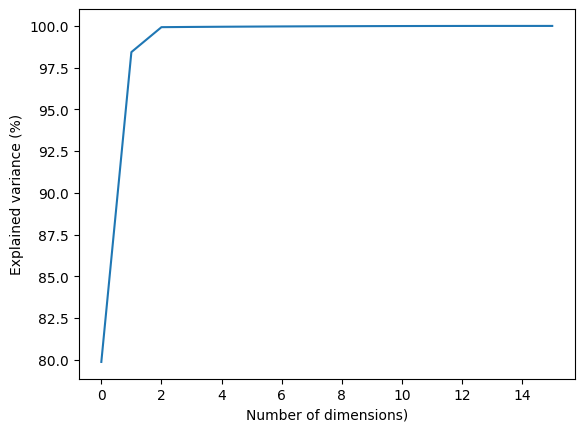

In [37]:
# apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X)

# display eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# display explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# create scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of dimensions)")
plt.ylabel("Explained variance (%)")

            0          1
0  125.114303  -4.743202
1    5.759998 -36.346942
2   65.520783   4.133282
3   72.676697 -23.723674
4   85.084483 -24.326430

Size: 
(4981, 2)


<AxesSubplot: >

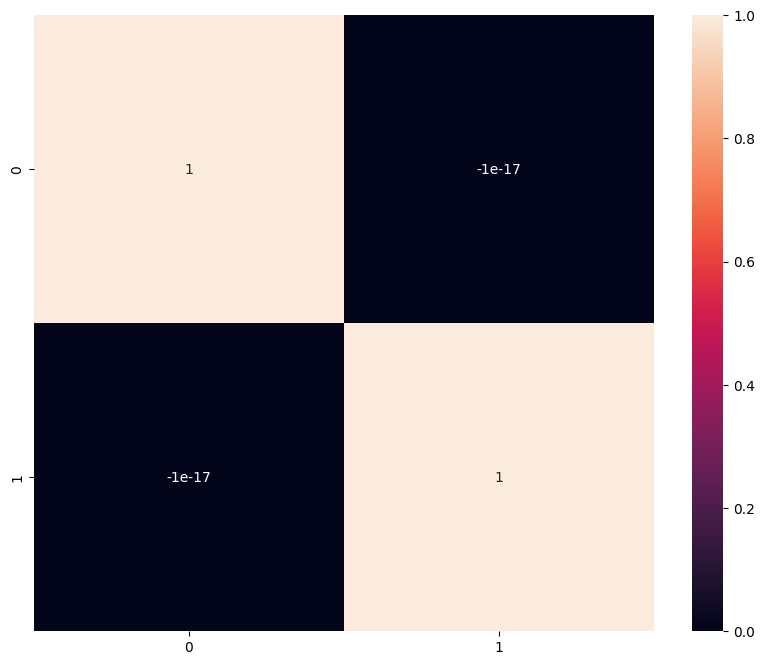

In [38]:
# apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# create transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

# display pca correlation heatmap
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), annot=True)

Train accuracy: 0.95
Test accuracy: 0.95

Test confusion_matrix


Text(50.722222222222214, 0.5, 'True')

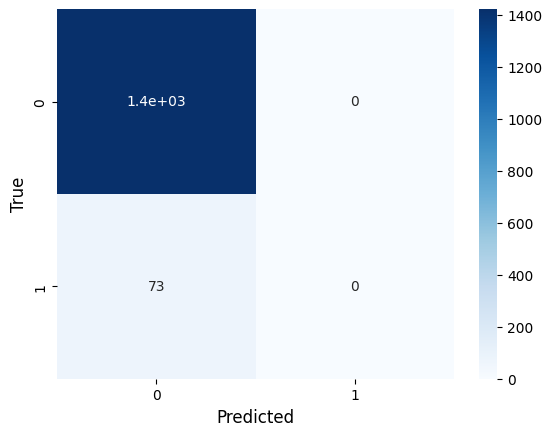

In [39]:
# create train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, shuffle=True, random_state=2)

# initialize logistic regression model
model_pca = LogisticRegression(max_iter=2500)

# train model
model_pca.fit(X_train_pca, y_train)

# compute predictions
y_pred_pca = model_pca.predict(X_test_pca) # Predictions

# measure accuracy
print("Train accuracy:", np.round(accuracy_score(y_train, model_pca.predict(X_train_pca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_test, y_pred_pca), 2))

# create confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix_pca, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)


Test confusion_matrix


Text(50.722222222222214, 0.5, 'True')

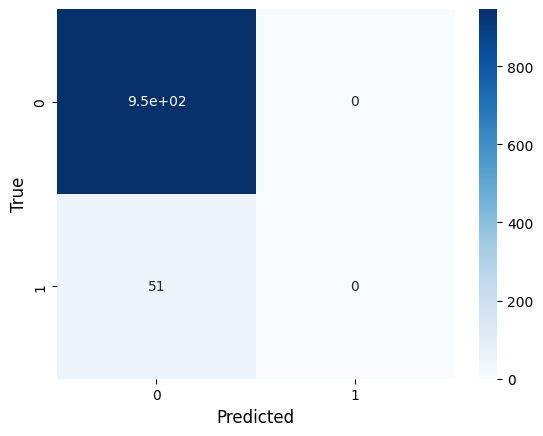

In [40]:
# construct pipeline for model with PCA
sc = StandardScaler()
pca = PCA(n_components=2)
log_reg = LogisticRegression(max_iter=2500)

log_reg_model = Pipeline([
    ('std_scaler', sc),
    ('pca', pca),
    ('regressor', log_reg)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=2)
log_reg_model.fit(X_train,y_train)

# compute predictions
y_pred_log_reg = log_reg_model.predict(X_test)

# create confusion matrix
cf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# display confusion matrix
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix_log_reg, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

# display prescion recall fscore
#print(precision_recall_fscore_support(y_test, y_pred_log_reg))